## Kalman Filter

In [1]:
# Import libraries
import math as m
import numpy as np
import time
from scipy.stats import norm
import matplotlib.pyplot as plt

from scipy.optimize import fmin, fmin_bfgs

In [2]:
# Parameters Heston
mu = 0.02
kappa = 1.5
theta = 0.05
lambda_ = 0.18
rho = 0.5
v_0 = 0.04

In [3]:
# Initialization
v = v_0
log_lk = 0
H = np.array([1, 0])

# Discretization
Delta_t = 0.01

Simulation

In [4]:
def heston_sim(params, N = 500, dt = 1/200, S0 = 100):
    
    mu, kappa, theta, lambda_, rho, v_0 = params
    
    y = np.matrix(np.zeros((2, N+1)))
    
    y[0,0] = np.log(S0)
    y[1,0] = v_0

    Q = np.matrix([[1, rho],[rho, 1]])

    for i in range(1, N+1):
        Z1, Z2 = np.random.multivariate_normal([0,0], Q)
        
        v = max(y[1,i-1], 0)
        
        y[0, i] = y[0, i-1] + (mu-1/2*v)*dt + np.sqrt(v*dt)*Z1
        y[1, i] = y[1, i-1] + kappa*(theta-v)*dt + lambda_*np.sqrt(v*dt)*Z2
    return y

In [66]:
def ext_Kalman_filter(params):
    
    global y_KF, v_KF
    
    mu, kappa, theta, lambda_, rho, v_0 = params
        
        
    F = np.matrix([[1, -1/2*dt],[0, 1-kappa*dt]])
    U = np.matrix([[np.sqrt(v_0*dt), 0],[0, lambda_*np.sqrt(v_0*dt)]])
    Q = np.matrix([[1, rho],[rho, 1]])
    H = np.matrix([1,0])
    P = np.matrix([[0.01, 0],[0, 0.01]])
    I = np.identity(2)
    
    x_update = np.matrix([m.log(S0), v_0]).T
    
    y_KF = np.zeros(N)
    v_KF = np.zeros(N)
    
    func_obj = 0
    for i in range(1, N):
        
        x_pred = np.matrix([0,0], dtype=np.float64).T
        x_pred[0,0] = x_update[0,0] + (mu-1/2*x_update[1,0])*dt
        x_pred[1,0] = x_update[1,0] + kappa*(theta-x_update[1,0])*dt
        
        P_pred = F*P*F.T + U*Q*U.T
        
        A = H*P_pred*H.T
        
        A = A[0,0]
        
        err = y[i] - x_pred[0,0]
        
        func_obj += np.log(abs(A)) + err**2/A
        
        # Measurement

        K = P_pred*H.T/A

        x_update = x_pred + K*err
        
        # check if volatility not negative
        x_update[1,0] = max(1e-5, x_update[1,0]) 
        
        vk = x_update[1,0]
        
        U = np.matrix([[np.sqrt(vk*dt), 0],[0, lambda_*np.sqrt(vk*dt)]])
        
        P = (I-K*H)*P_pred
        
        y_KF[i] = x_update[0,0]
        v_KF[i] = x_update[1,0]
        
    return func_obj/N
    

In [72]:
nb_years = 10

N = 2000

dt = nb_years/N

S0 = 100

params_good = (mu, kappa, theta, lambda_, rho, v_0)

x = heston_sim(params_good, N, dt, S0)

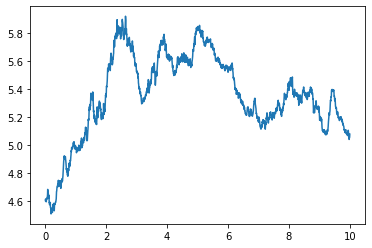

In [73]:
years = np.arange(x.shape[1]-1) * dt

plt.plot(years, x[0,1:].T)

In [74]:
def print_value(x):
    global iter_
    global args
    print(' ')
    print('i = ' + str(iter_))
    print('params = ' + str(x))
    print('rmse = ' + str(ext_Kalman_filter(x)))
    iter_ += 1

In [75]:
start_time = time.time()

y = np.array(x[0, :])[0]

N = 2000
S0 = 100
dt = 1/200

params = 0.03, 1.3, 0.07, 0.3, 0.6, 0.06

iter_ = 1

args = (y, S0, N, dt)

xopt, fopt, _, _, _ = fmin(ext_Kalman_filter, params, maxiter=100, callback=print_value, disp=True, retall=False, full_output=True)

elapsed_time = time.time() - start_time
print('Execution time was %0.7f seconds' % elapsed_time)

 
i = 1
params = [0.03075 1.3325  0.063   0.3075  0.615   0.0615 ]
rmse = -7.330853909672208
 
i = 2
params = [0.03075 1.3325  0.063   0.3075  0.615   0.0615 ]
rmse = -7.330853909672208
 
i = 3
params = [0.03075 1.3325  0.063   0.3075  0.615   0.0615 ]
rmse = -7.330853909672208
 
i = 4
params = [0.03075 1.3325  0.063   0.3075  0.615   0.0615 ]
rmse = -7.330853909672208
 
i = 5
params = [0.03075 1.3325  0.063   0.3075  0.615   0.0615 ]
rmse = -7.330853909672208
 
i = 6
params = [0.02980556 1.37824074 0.05893827 0.31222222 0.67111111 0.05881481]
rmse = -7.336809677921377
 
i = 7
params = [0.03180556 1.37824074 0.05893827 0.31222222 0.63111111 0.05881481]
rmse = -7.346610167436464
 
i = 8
params = [0.03180556 1.37824074 0.05893827 0.31222222 0.63111111 0.05881481]
rmse = -7.346610167436464
 
i = 9
params = [0.03180556 1.37824074 0.05893827 0.31222222 0.63111111 0.05881481]
rmse = -7.346610167436464
 
i = 10
params = [0.03180556 1.37824074 0.05893827 0.31222222 0.63111111 0.05881481]
rmse 

<ipython-input-75-ce4fcfcd6561>:15: RuntimeWarning: Maximum number of iterations has been exceeded.
  xopt, fopt, _, _, _ = fmin(ext_Kalman_filter, params, maxiter=100, callback=print_value, disp=True, retall=False, full_output=True)


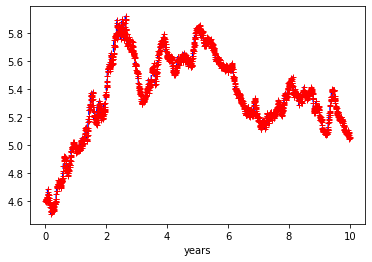

In [76]:
plt.plot(years[1:], x[0,2:].T, 'b--')
plt.plot(years[1:], y_KF[1:], 'r+')
plt.xlabel('years')
plt.show()

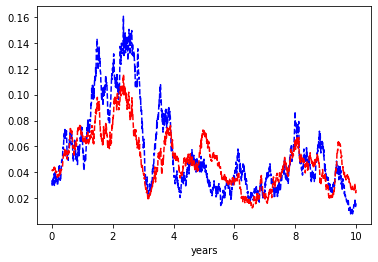

In [79]:
plt.plot(years[1:], x[1,2:].T, 'b--')
plt.plot(years[1:], v_KF[1:], 'r--')
plt.xlabel('years')
plt.show()

In [80]:
xopt

array([0.04146261, 1.55318113, 0.04620168, 0.32958492, 0.42236126,
       0.04135475])

In [81]:
params_good

(0.02, 1.5, 0.05, 0.18, 0.5, 0.04)

## Particle Filter

import some libraries.

Initiialization.

In [146]:
N = 200
S0 = 100
dt = 1/20

Let us simulate the data with the good parameters.

In [147]:
x_pf = heston_sim(params_good, N, dt, S0)

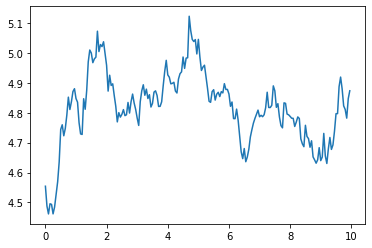

In [148]:
years = np.arange(x_pf.shape[1]-1) * dt

plt.plot(years, x_pf[0,1:].T)

In [149]:
y = np.array(x_pf[0, :])[0]


In [150]:
def proposal_distribution(N, x_prev, dy, params):
    
    mu, kappa, theta, lambda_, rho = params
    
    m = x_prev + kappa*(theta-x_prev)*dt + lambda_*rho*(dy - (mu-1/2*x_prev)*dt)
    s = lambda_*np.sqrt(x_prev*(1-rho**2)*dt)
    
    return norm.rvs(m, s, N)

In [151]:
def likelihood(y, x, x_prev, y_prev, params):
    
    mu, kappa, theta, lambda_, rho = params
    
    m = y_prev + (mu-1/2*x)*dt
    s = np.sqrt(x_prev*dt)
    
    return norm.pdf(y,m,s)

In [152]:
def transition(x, x_prev, params):
        mu, kappa, theta, lambda_, rho = params
        
        m = 1/(1+1/2*lambda_*rho*dt) * (x_prev + kappa*(theta-x_prev)*dt + 1/2*lambda_*rho*x_prev*dt)
        s = 1/(1+1/2*lambda_*rho*dt) * lambda_ * np.sqrt(x_prev*dt)
        
        return norm.pdf(x, m, s)

In [153]:
def proposal(x, x_prev, dy, params):
        mu, kappa, theta, lambda_, rho = params
        
        m = x_prev + kappa*(theta-x_prev)*dt + lambda_*rho*(dy - (mu-1/2*x_prev)*dt)
        s = lambda_*np.sqrt(x_prev*(1-rho**2)*dt)
        
        return norm.pdf(x, m, s)

In [154]:
def parameter_states_init(N, bounds):
    # initialize param states
    params_states = np.zeros((len(bounds)
        , N))
    b0, b1, b2, b3, b4 = bounds
    params_states[0] = np.random.rand(N)*(b0[1]-b0[0])+b0[0]
    params_states[1] = np.random.rand(N)*(b1[1]-b1[0])+b1[0]
    params_states[2] = np.random.rand(N)*(b2[1]-b2[0])+b2[0]
    params_states[3] = np.random.rand(N)*(b3[1]-b3[0])+b3[0]
    params_states[4] = np.random.rand(N)*(b4[1]-b4[0])+b4[0]
    return params_states

In [155]:
def resample_state(particles, weights):
    N = len(particles)
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1. 
    indexes = np.searchsorted(cumulative_sum, np.random.rand(N))

    particles[:] = particles[indexes]
    new_weights = np.ones(len(weights)) / len(weights)
    return particles, new_weights

In [156]:
def resample(x_pred, weights, params_states):
        params_states[0], _ = resample_state(params_states[0], weights)
        params_states[1], _ = resample_state(params_states[1], weights)
        params_states[2], _ = resample_state(params_states[2], weights)
        params_states[3], _ = resample_state(params_states[3], weights)
        params_states[4], _ = resample_state(params_states[4], weights)
        x_pred, weights = resample_state(x_pred, weights)
        return x_pred, weights, params_states

In [157]:
def prediction_density(y, y_prev, x, mu):
    m = y_prev + (mu-1/2*x)*dt
    s = np.sqrt(x*dt)
    return norm.pdf(y, m, s)

In [158]:
def predict(x_pred, particles, y_prev, mu):
    
    y_hat = y_prev + (mu-1/2*x_pred)*dt + np.sqrt(particles*dt)*norm.rvs()
    py_hat = np.array([np.mean(prediction_density(y_hat[k], y_prev, x_pred, mu)) for k in range(len(y_hat))])
    
    py_hat = py_hat/sum(py_hat)
    
    return np.sum(py_hat * y_hat)

In [159]:
def _neff(weights):
        return 1. / np.sum(np.square(weights))

In [160]:
def particle_filter(params):
    global y_PF, v_PF
    
    mu, kappa, theta, lambda_, rho, v_0 = params
    
    print(params[:-1])
    
    params_states = parameter_states_init(N, params[:-1])
    
    y_PF = np.zeros(N)
    v_PF = np.zeros(N)
    
    y_PF[0] = y[0]
    v_PF[0] = v_0
    
    weights = np.array([1/N] * N)
    
    particles = norm.rvs(v_0, 0.02, N)
    particles = np.maximum(1e-4, particles)
    
    params_steps = np.zeros((len(params)-1, len(y)))
    params_steps.transpose()[0] = np.mean(params_states, axis=1)
    
    for i in range(1, N):
        dy = y[i] - y[i-1]
        
        x_pred = proposal_distribution(N, particles, dy, params_states)
        x_pred = np.maximum(1e-3, x_pred)
        
        Li = likelihood(y[i], x_pred, particles, y[i-1], params_states)
        I = proposal(x_pred, particles, dy, params_states)
        T = transition(x_pred, particles, params_states)
        weights = weights * (Li*T/I)
        weights = weights/sum(weights)
        
        if _neff(weights) < 0.7*N:
            print('resampling since: {}'.format(_neff(weights)))
            x_pred, weights, params_states = resample(x_pred, weights, params_states)
        
        y_hat = predict(x_pred, particles, y[i-1], np.mean(params_states[0]))
        y_PF[i] = y_hat
        
        v_PF[i] = np.sum(x_pred * weights)
        particles = x_pred
        params_steps.transpose()[i] = np.sum(np.multiply(params_states, weights[np.newaxis, :]), axis=1)
        
        print("Done with iter: {}".format(i))
        
    return (v_PF, params_steps, y_PF)

In [166]:
mu = (0.01, 0.05)
kappa = (0.5, 3)
theta = (0.02, 0.2)
lambda_ = (0.01, 0.91)
rho = (-0.5, 1)
v_0 = params_good[-1]

params = [mu, kappa, theta, lambda_, rho, v_0]

In [167]:
v, param_steps, obs = particle_filter(params)

[(0.01, 0.05), (0.5, 3), (0.02, 0.2), (0.01, 0.91), (-0.5, 1)]
resampling since: 93.51781559775546
Done with iter: 1
resampling since: 77.52555990243762
Done with iter: 2
Done with iter: 3
resampling since: 117.71243087095964
Done with iter: 4
Done with iter: 5
resampling since: 71.88982136154222
Done with iter: 6
Done with iter: 7
resampling since: 76.60231371352651
Done with iter: 8
resampling since: 139.68333970378137
Done with iter: 9
resampling since: 99.85393603406744
Done with iter: 10
resampling since: 37.604065525008885
Done with iter: 11
Done with iter: 12
resampling since: 131.8956434065581
Done with iter: 13
Done with iter: 14
resampling since: 72.82477252684717
Done with iter: 15
resampling since: 101.5429653957525
Done with iter: 16
resampling since: 115.76208084581845
Done with iter: 17
Done with iter: 18
resampling since: 138.65170695759917
Done with iter: 19
Done with iter: 20
resampling since: 95.3076360007633
Done with iter: 21
Done with iter: 22
resampling since: 36

# neg vol: [[0]]


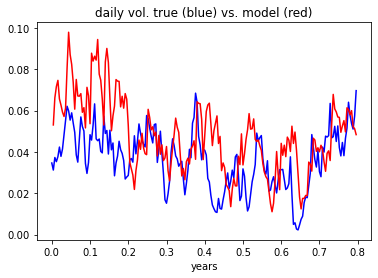

In [168]:
print("# neg vol:", sum(x_pf[1,1:].T<0))
plt.plot(years[:], np.array(x_pf[1,1:])[0], 'b-')
plt.plot(years[1:], v[1:], 'r-')
plt.title('daily vol. true (blue) vs. model (red)')
plt.xlabel('years')
plt.show()

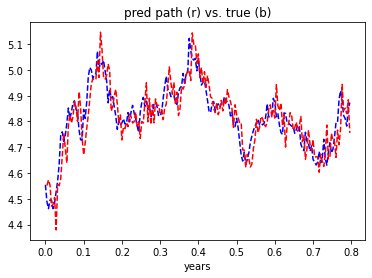

In [169]:
years = np.arange(x_pf.shape[-1]-1) * (1/250)
plt.plot(years, x_pf[0,1:].T, 'b--')
plt.plot(years[1:], obs[1:], 'r--')
plt.plot()
plt.title('pred path (r) vs. true (b)')
plt.xlabel('years')
plt.show()

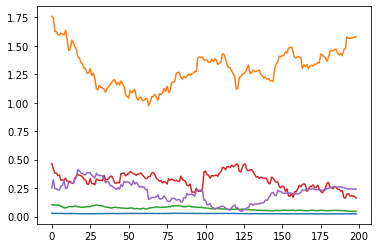

In [171]:
plt.plot(param_steps[:,:-2].transpose())
plt.show()

In [172]:
print("Final parameters: {}, {}, {}, {}, {}, {}".format(param_steps[0,-2], param_steps[1,-2], param_steps[2,-2], param_steps[3,-2], param_steps[4,-2], params_good[-1]))

Final parameters: 0.024376046086613087, 1.6039377077996422, 0.04640363708519914, 0.15877020410631015, 0.24186068492994112, 0.04


In [173]:
print("Good parameters", params_good)

Good parameters (0.02, 1.5, 0.05, 0.18, 0.5, 0.04)


In [123]:

# Parameters Heston
mu = 0.02
kappa = 1.5
theta = 0.05
lambda_ = 0.18
rho = 0.5
v_0 = 0.04
params_good = (mu, kappa, theta, lambda_, rho, v_0)